# Monte-Carlo Simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

## 1.1 Data Creation
The prior probalibity and likelihoods are given by 
$$p(Y=0|Y=1)=\frac{1}{2}$$
$$p(X=x|Y=0)=2-2x$$
$$p(X=x|Y=1)=2x$$

To use inverse transform sampling, we need to get the CDF(Cumulative Distribution Function) under the condition of $Y=0$ and $Y=1$ respectively.

$$F_0(x) = \int_0^1{p(X=x|Y=0)} = 2x-x^2$$
$$F_1(x) = \int_0^1{p(X=x|Y=1)} = x^2$$

The inverse function of $F_0$ and $F_1$ are as follows:

$$F_0^{-1}(x) = 1-\sqrt{1-x}$$
$$F_1^{-1}(x) = \sqrt{x}$$

In [2]:
def F0_inverse(x):
    return 1-math.sqrt(1-x)

def F1_inverse(x):
    return math.sqrt(x)

def create_data(N):
    """
    Args:
        N: scale of generated data
    Returns:
        X: feture variables
        Y: response
    """
    X = np.random.rand(N)
    Y = np.random.randint(low=0, high=2, size=N) # generate random integer from {0,1}
    for i in range(N):
        if Y[i] == 0:
            X[i] = F0_inverse(X[i])
        if Y[i] == 1:
            X[i] = F1_inverse(X[i])
    return X, Y
        
X, Y = create_data(10000)

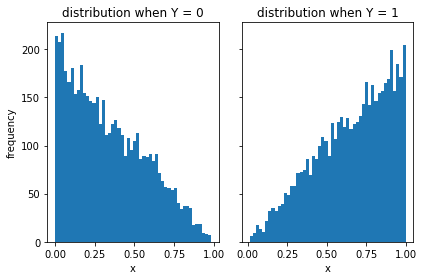

In [3]:
def check_distributon(X, Y):
    X0 = []
    X1 = []
    for i in range(len(Y)):
        if Y[i] == 0:
            X0.append(X[i])
        else:
            X1.append(X[i])
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("frequency")
    axs[1].set_xlabel("x")
    axs[0].set_title("distribution when Y = 0")
    axs[1].set_title("distribution when Y = 1")
    
    axs[0].hist(X0, bins=50)
    axs[1].hist(X1, bins=50)
    
check_distributon(X,Y)

## 1.2 Classification by Thresholding
Confirm experimentally for $x_t ∈ {0.2,0.5,0.6}$ that the predicted error rates are correct;  
Verify that the minimum overall error of 25% is achieved when the threshold $x_t = 0.5$ (optimal Bayes classifier). 

In [48]:
def predict_y(x, threshold, anti=False):
    """
    threshold classifier
    Args:
        x: feature
        threshold: as the name
        anti: apply rule A when anti is False and rule B when anti is True
    """
    ret = 0
    if x<threshold:
        ret = 0
    else:
        ret = 1
    if anti:
        return 1-ret
    else:
        return ret
        
def predict_Y(X, threshold, anti=False):
    predicted_Y = []
    for i in range(len(X)):
        pred_y = predict_y(X[i], threshold, anti)
        predicted_Y.append(pred_y)
    predicted_Y = np.asarray(predicted_Y)
    return predicted_Y
        
def calculate_err(Y, predicted_Y):
    N = len(Y)
    wrong_pred = 0
    for i in range(N):
        if predicted_Y[i] != Y[i]:
            wrong_pred = wrong_pred + 1
    return wrong_pred/N

def single_test(threshold, M, repeat=10):
    """
    Apply the given threshold to the classifier on the data set of size M,
        repeat a given number of times and calculate the mean and standard deviation of err rate
    Args:
        threshold: as the name
        M: size of data set
        repeat: run the test 'repeat' times to calculate mean and standard deviation
    """
    errs_A = []
    errs_B = []
    for i in range(repeat):
        X, Y = create_data(M)
        pred_Y_A = predict_Y(X, threshold)
        pred_Y_B = predict_Y(X, threshold, anti=True)
        err_A = calculate_err(Y, pred_Y_A)
        err_B = calculate_err(Y, pred_Y_B)
        errs_A.append(err_A)
        errs_B.append(err_B)
    mean_A = np.mean(errs_A)
    mean_B = np.mean(errs_B)
    std_A = np.std(errs_A)
    std_B = np.std(errs_B)
    print("Rule A: mean: {:.4f}".format(mean_A) + " std: {:.4f}".format(std_A))
    print("Rule B: mean: {:.4f}".format(mean_B) + " std: {:.4f}".format(std_B))
    return std_A, std_B

threshold: 0.2
size: 10
Rule A: mean: 0.3800 std: 0.1536
Rule B: mean: 0.6200 std: 0.1536
size: 100
Rule A: mean: 0.3300 std: 0.0371
Rule B: mean: 0.6700 std: 0.0371
size: 1000
Rule A: mean: 0.3385 std: 0.0167
Rule B: mean: 0.6615 std: 0.0167
size: 10000
Rule A: mean: 0.3402 std: 0.0032
Rule B: mean: 0.6598 std: 0.0032
threshold: 0.5
size: 10
Rule A: mean: 0.2700 std: 0.1100
Rule B: mean: 0.7300 std: 0.1100
size: 100
Rule A: mean: 0.2740 std: 0.0445
Rule B: mean: 0.7260 std: 0.0445
size: 1000
Rule A: mean: 0.2494 std: 0.0089
Rule B: mean: 0.7506 std: 0.0089
size: 10000
Rule A: mean: 0.2466 std: 0.0026
Rule B: mean: 0.7534 std: 0.0026
threshold: 0.6
size: 10
Rule A: mean: 0.3000 std: 0.1265
Rule B: mean: 0.7000 std: 0.1265
size: 100
Rule A: mean: 0.2420 std: 0.0471
Rule B: mean: 0.7580 std: 0.0471
size: 1000
Rule A: mean: 0.2682 std: 0.0144
Rule B: mean: 0.7318 std: 0.0144
size: 10000
Rule A: mean: 0.2592 std: 0.0033
Rule B: mean: 0.7408 std: 0.0033


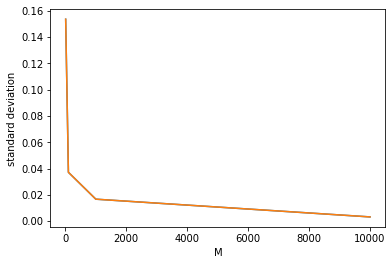

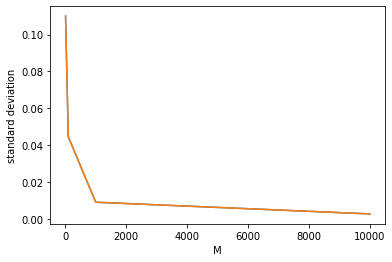

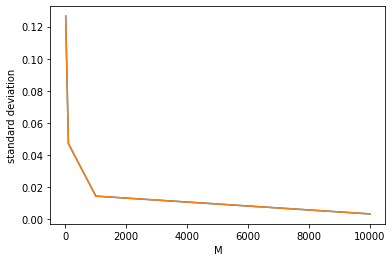

In [50]:
Ms = [10, 100, 1000, 10000]
thresholds = [0.2, 0.5, 0.6]
for threshold in thresholds:
    stds_A = []
    stds_B = []
    print("threshold: " + str(threshold))
    for M in Ms:
        print("size: " + str(M))
        std_A, std_B = single_test(threshold, M)
        stds_A.append(std_A)
        stds_B.append(std_B)
    fig, ax = plt.subplots()
    ax.plot(Ms, stds_A)
    ax.plot(Ms, stds_B)
    ax.set_xlabel("M")
    ax.set_ylabel("standard deviation")
        

We can see from the figures above the standard deviation of error decreases exponetially.  

$$p(error|A; x_t) = \frac{1}{4} + {(x_t - \frac{1}{2})}^2 $$
$$p(error|B; x_t) = \frac{3}{4} - {(x_t - \frac{1}{2})}^2 = 1-p(error|A; x_t)$$ 
Theoretically, 
$$p(error|A; 0.2) = 0.34$$
$$p(error|A; 0.5) = 0.25$$
$$p(error|A; 0.6) = 0.26$$
$$p(error|B; 0.2) = 0.66$$
$$p(error|B; 0.5) = 0.75$$
$$p(error|B; 0.6) = 0.74$$

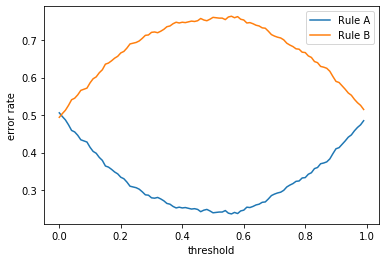

In [29]:
def err_curve(M):
    X, Y = create_data(M)
    threshold = []
    err_rate_A = []
    err_rate_B = []
    for i in np.arange(0,1,0.01):
        predicted_Y_A = predict_Y(X, i)
        predicted_Y_B = predict_Y(X, i, anti=True)
        err_A = calculate_err(Y, predicted_Y_A)
        err_B = calculate_err(Y, predicted_Y_B)
        threshold.append(i)
        err_rate_A.append(err_A)
        err_rate_B.append(err_B)
    fig, ax = plt.subplots()
    ax.plot(threshold, err_rate_A, label="Rule A")
    ax.plot(threshold, err_rate_B, label="Rule B")
    ax.set_xlabel("threshold")
    ax.set_ylabel("error rate")
    ax.legend()

err_curve(1000)

So we can see from the figure above that the error rate is smallest when threshold = 0.5

## 1.3 Baseline Classification


M: [10, 100, 1000, 10000]
mean_C: [0.48999999999999994, 0.4800000000000001, 0.496, 0.49792]
std_C: [0.12999999999999998, 0.05118593556827892, 0.008865664103720609, 0.004498399715454378]
mean_D: [0.47000000000000003, 0.514, 0.48929999999999996, 0.4972]
std_D: [0.14866068747318506, 0.043634848458542874, 0.014184851074297549, 0.004073573369905096]


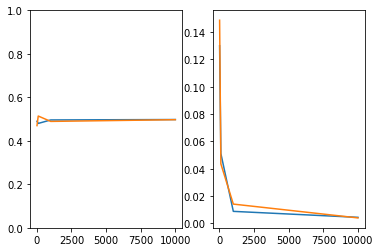

In [43]:
def predict_C(X):
    N = len(X)
    return np.random.randint(0,2,N)

def predict_D(X):
    N = len(X)
    return np.ones(N)

def test1_3(M, T="guess",repeat=10):
    errs = []
    for i in range(repeat):
        X, Y = create_data(M)
        if T=="guess":
            pred_Y = predict_C(X)
        else:  # constant
            pred_Y = predict_D(X)
        err = calculate_err(pred_Y, Y)
        errs.append(err)
    mean = np.mean(errs)
    std = np.std(errs)
    return mean, std

def statistics1_3(Ms):
    means_C = []
    stds_C = []
    means_D = []
    stds_D = []
    for M in Ms:
        mean_C, std_C = test1_3(M, T="guess")
        mean_D, std_D = test1_3(M, T="constant")
        means_C.append(mean_C)
        means_D.append(mean_D)
        stds_C.append(std_C)
        stds_D.append(std_D)
    # print results
    print("M:", Ms)
    print("mean_C:", means_C)
    print("std_C:", stds_C)
    print("mean_D:", means_D)
    print("std_D:", stds_D)
    fig, axs = plt.subplots(1,2)
    axs[0].set_ylim((0,1))
    axs[0].plot(Ms, means_C)
    axs[0].plot(Ms, means_D)
    axs[1].plot(Ms, stds_C)
    axs[1].plot(Ms, stds_D)

statistics1_3([10,100,1000, 10000])
        

## 1.4 Nearest Neighbor Classification

In [63]:
def generate_training_set(N):
    if N==2:
        Y = np.asarray([0,1])
        X = np.random.rand(2)
        X[0] = F0_inverse(X[0])
        X[1] = F1_inverse(X[1])
        return X, Y
    else:
        return create_data(N)
    
def find_nearest_neighbor(x, X):
    """
    find the nearest neighbor of x in X
    """
    current_i = 0
    current_min = 1
    for i in range(len(X)):
        if abs(x-X[i])<current_min:
            # update min and i
            current_min = abs(x-X[i])
            current_i = i
    return current_i

    
def NN_classifier(X, train_X, train_Y):
    """
    Args:
        X: features
        train_X, train_Y: training set
    Returns:
        Y: predicted response
    """
    pred_Y = []
    for i in range(len(X)):
        nn_i = find_nearest_neighbor(X[i], train_X)
        pred_Y.append(train_Y[nn_i])
    return pred_Y


def NN_classifier_test(M, test_size, train_size):
    errs = []
    test_X, test_Y = create_data(test_size)
    for i in range(M):
        train_X, train_Y = generate_training_set(train_size)
        pred_Y = NN_classifier(test_X, train_X, train_Y)
        err = calculate_err(test_Y, pred_Y)
        errs.append(err)
    print(np.mean(errs))
    

NN_classifier_test(M=100, test_size=1000, train_size=2)
NN_classifier_test(M=100, test_size=1000, train_size=100)

0.34065999999999996
0.3399400000000001
